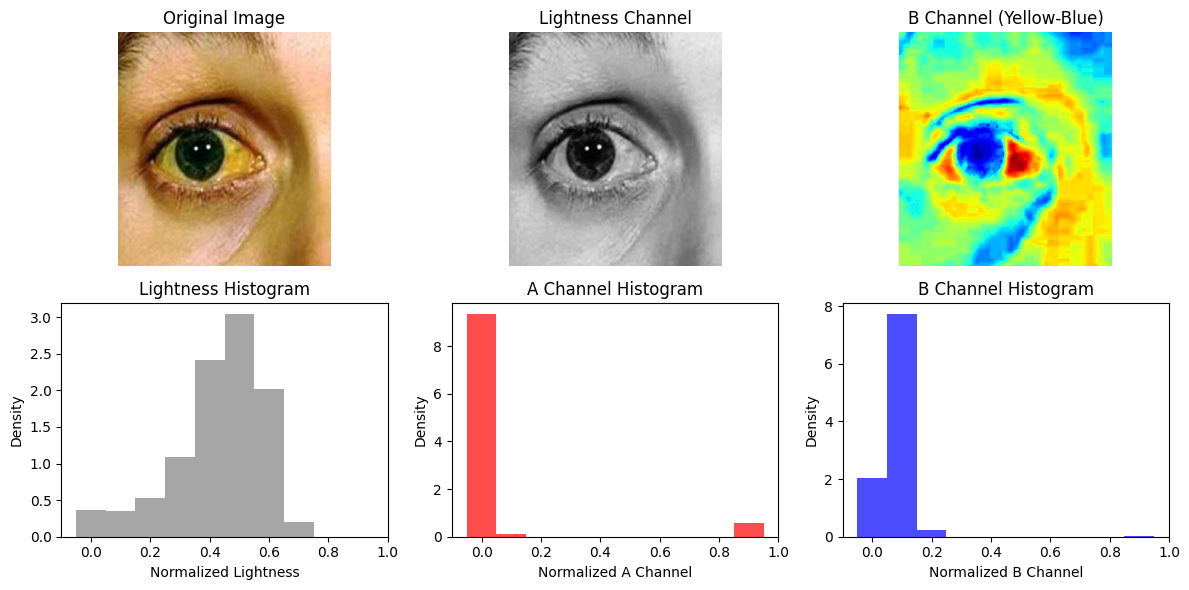

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


def load_image_from_directory(filename):
    image_path = os.path.join(filename)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def extract_color_features(image, bins=10, scale=0.8, show_plot=True):
    lab_image = cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_RGB2LAB)
    lightness, a_channel, b_channel = lab_image[:, :, 0], lab_image[:, :, 1], lab_image[:, :, 2]

    lightness = lightness / 255.0 * scale
    a_channel = (a_channel + 128) / 255.0 
    b_channel = (b_channel + 128) / 255.0

    lightness_hist, lightness_bins = np.histogram(lightness, bins=bins, range=(0, 1), density=True)
    a_hist, a_bins = np.histogram(a_channel, bins=bins, range=(0, 1), density=True)
    b_hist, b_bins = np.histogram(b_channel, bins=bins, range=(0, 1), density=True)
    
    feature_vector = np.concatenate([lightness_hist, a_hist, b_hist])
    
    if show_plot:
        plt.figure(figsize=(12, 6))
        
        plt.subplot(2, 3, 1)
        plt.imshow(image)
        plt.axis('off')
        plt.title('Original Image')
        
        plt.subplot(2, 3, 2)
        plt.imshow(lab_image[:, :, 0], cmap='gray')
        plt.axis('off')
        plt.title('Lightness Channel')
        
        plt.subplot(2, 3, 3)
        plt.imshow(lab_image[:, :, 2], cmap='jet')
        plt.axis('off')
        plt.title('B Channel (Yellow-Blue)')
        
        plt.subplot(2, 3, 4)
        plt.bar(lightness_bins[:-1], lightness_hist, width=1/bins, color='gray', alpha=0.7)
        plt.title('Lightness Histogram')
        plt.xlabel('Normalized Lightness')
        plt.ylabel('Density')
        
        plt.subplot(2, 3, 5)
        plt.bar(a_bins[:-1], a_hist, width=1/bins, color='red', alpha=0.7)
        plt.title('A Channel Histogram')
        plt.xlabel('Normalized A Channel')
        plt.ylabel('Density')
        
        plt.subplot(2, 3, 6)
        plt.bar(b_bins[:-1], b_hist, width=1/bins, color='blue', alpha=0.7)
        plt.title('B Channel Histogram')
        plt.xlabel('Normalized B Channel')
        plt.ylabel('Density')
        
        plt.tight_layout()
        plt.show(block=True) 
    
    return feature_vector

if __name__ == "__main__":
    image_filename = "image_01.jpg" 
    image = load_image_from_directory(image_filename)
    extract_color_features(image, show_plot=True)
